<img src="assets/logo.png" width="150">
<br>

**Coursebook: Convolutional Neural Network Basic**

- Course Length: 3 Hours
- Last Update: February 2022

___

Develop by Dwi Gustin Nurdialit




The coursebook is  prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

# Preface

## Background

Casting is a manufacturing process in which liquid material is poured into a mold to solidify. Many types of defects or unwanted irregularities can occur during this process. The industry has its quality inspection department to remove defective products from the production line, but this is very time consuming since it is carried out manually. Furthermore, there is a chance of misclassifying due to human error, causing rejection of the whole product order. 

From these problems we will use image data to create a machine learning model. One of the most popular and good methods for working with image datasets is the Convolutional Neural Network (CNN).

This material aims to provide an understanding to the workshop participants to automate the inspection process by training top-view images of a casted submersible pump impeller using Convolutional Neural Network (CNN). One Instructor and two Teaching Assistants will help participants troubleshoot or help with any difficulties encountered.


## Training Objective

The objective of this course is to provide participants with a comprehensive introduction to understanding deep learning model building for image data using Python. We will learn techniques on how to process image data to obtain a deep learning model. Syllabus includes:

- **Convolutional Neural Networks:**
    + Convolution concept: kernel convolutinals, strides, padding, and filter
    + Convolutional Neural Network Architecture


___

# Convolutional Neural Network (CNN)

# Convolutional Neural Network

Convolutional Neural Network are nowadays standard architecture to deal with image data. Its history started in 1989 when Yan Lecunn created its first Optical Character Recognition (OCR) model to classify numbers and characters. But due to the flaw of deep neural network activation functions, most of the network will fails of either vanishing gradient or exploding gradient. The problem occurs until in 2011, Yoshua Bengio created Rectified Linear Unit that enables most of deep learning architecture to avoid the problems. 

A year after, Alex Krizhevsky re-created Yann Lecunn's CNN and implmented Relu in it. The model was submitted on 2012 Imagenet Competition and the performance was way better than any Deep Neural Network architecture at that time. The model then become the first heavily known CNN that works and its named upon its author, "Alex Net". It marked as the starting point of Deep Learning hype for computer vision. 

## Convolution Concepts

In previous module, we learned to classify a hand-digit image into its classes. If you take a look closely, you might notice that there are so many empy space that actually doesn't affect the classification much. All those irrelevant pixels get in anyway into our neural network models, burdening the network with huge feature that are irrelevant to the class and makes it harder to train. 

What if we could extract those relevant values only and remove all the irrelevant pixels? That way our network will have so much lighter feature but with relatively same (or even better) information. This is when convolution takes part. Please take a look at convolutional neural network architecture below : 

<figure>
    <center>
    <img src="assets/cnn-general.jpeg" width="90%">
<!--     <figcaption> Fig.1 - Illustration of Convolutional Neural Network Atchitecture </figcaption> -->
    </center>
</figure>


If you take a close look, the end of the network was basically a neural network. Nowadays, these layers are called dense (since all the node are densely connected). Based on the illustration, the convolution part was used to extract important feature from the data before being fed into a dense layers. The convoluted data might be **smaller** in size but **richer** in information, resulting in more effective works for the dense layers. 

There are two main activity in the convolution, firstly the convolution itself, and the second is pooling. 


### 1. Convolution

To briefly understand how the convolution works, please take alook at below picture of animal then make a guess what kind of animal it is.

<figure>
    <center>
    <img src="assets/tasmanian.jpg" width="35%">
    </center>
</figure>

Have you make your guess? You probably went for cat, rat, or even a bear. Whatever you have guessed, the interesting part is the process of guessing. There should be some physical characteristic from the image that snaps your brain to think like "Oh, this particular part of the body looks like cat", and that's just how our brain works. It remember particular parts of an object. In fact, it really goods at finding pattern and visual characteristics. If we are given something we don't know, our brain will certainly think of something similar in the past. This is something that we are going to try to mimic using convolution process. 

A convolution will extract meaningful information from the data using filters. These filters works just like any filter in real world, it has specific usage and has sensitivity over a very specific means. For eaxmple, think of a UV filter for camera lens. It will block UV lights to reduce the excesssive blue color from the sky. The more UV light on the field, the more this filter will active to tell you that there are UV lights. 

Mathematically, the feedforward process of convolutional neural network is called "cross correlation". The term convolution comes from its derivative function when the network do backpropagation. Below are the illustraion and mathematical formula on how the network do feedforwards


$$ F \circ I (x,y) = \sum_{j=-N}^{N} \sum_{i=-N}^{N} F(i,j) \times I(x+i, y+j)$$

<figure>
    <center>
    <img src="assets/conv-hackernoon.gif" width="50%">
<!--     <figcaption> Fig.2 - Convolution Illustration by Hackernoon</figcaption> -->
    </center>
</figure>
    

In [1]:
# Import the libraries
import matplotlib.pyplot as plt 
import json

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In keras, the convolution implementation lays under the `keras.layes.Conv2D` class. Below are example of creating the layer then attach it in the model : 

In [2]:
# Create a single layer of convolution
my_conv_layer = keras.layers.Conv2D(
    input_shape = (28,28,1),
    filters = 5,  # Number of filter
    kernel_size = 3, # Filter size
    strides = 1, # Steps regarding the convolution 
    padding = 'same',
    activation = 'relu', # Default : no activation
)

From above code, the parameters will works as follows:
- **filters** will determine how many number of filter will be used to convolve the image. The more the filter, the more likely it is to learn more specific features. This number is equivalent with number of neuron in a dense layer (`units`)
- **kernel_size** will determine each filter size. Larger feature will catch more information and most likely generalize better than smaller ones. But study shows that kernel size of 3 and 5 is powerful in terms of algorithms complexity. Tho, there is no strict standard in determining the kernel size. The best practice is to use a small odd values. 
- **strides** acts as steps in moving the filter during the convolutoin process. Large strides will make the steps larger and make the filter potentially missed some meaningful feature (pixels)
- **padding** is added if we wanted the output size to be same with the input by doing some padding according to the filter size. 

In order to see how the convolutional layer works, we will try to feed from mnist digit dataset. The shape will be `(batch_size, dim1, dim2)`. 

In [3]:
# Load the data
with np.load('data_input/mnist.npz') as data:
  x_train = data['x_train']
  y_train = data['y_train']
  x_test = data['x_test']
  y_test = data['y_test']

# Check type and shape
print('data type \t: ', type(x_train), type(y_train))
print('training size \t: ', x_train.shape, y_train.shape)
print('Test size \t: ', x_test.shape, y_test.shape)

data type 	:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
training size 	:  (60000, 28, 28) (60000,)
Test size 	:  (10000, 28, 28) (10000,)


Reshape the dimension then transform the data type as float.

In [4]:
sample_image = x_train[0].reshape(-1,28,28,1).astype('float')

The tenshorshape of [1,28,28,1] determines the image size of 28x28x1. To see how the sample image looks like, we can visualize the first element of `x_train[0]`

Label: 5


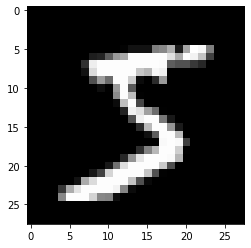

In [5]:
image = x_train[0]
plt.imshow(image, cmap='gray');
print('Label:', y_train[0])

Once the dummy data is ready, we can feed the layer with it

In [6]:
# Feedforward x through my_conv_layer
output_conv = my_conv_layer(sample_image)
output_conv.shape

2022-02-17 11:37:01.372624: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([1, 28, 28, 5])

From the result above:

- The first dimension of the output represents the number of data or images that being fed in (batch size)
- The last dimension represents the number of filters exists in the particular layers. Any other dimension between the two is calculated as we previously presented in convolution inllustration. 

To make a grasp on how a filter process the data, below is an illustration on how the first filter will output once the first image is fed in

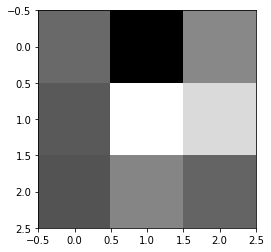

In [7]:
plt.imshow(my_conv_layer.weights[0][:,:,:,0], cmap='gray');

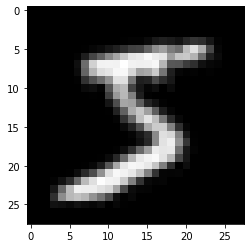

In [8]:
output_filter1 = output_conv[:,:,:,0]
plt.imshow(output_filter1[0], cmap='gray');

From the resulting images we can actually see a representation object on what actually the filters learns. You can see the example from the article of [visualizing CNN filters](https://cs231n.github.io/understanding-cnn/)

### 2. Pooling

If we have convoluted feature extracted from the convolutions process, it may somehow still consists redundant or slightly insignifficant features. Not to mention that the size might explode. The idea of pooling is to summarize and simplify the convolved feature by doing aggreagation over the convolved feature. Remember that we wanted the dense layer to be fed with small yet meaningful features. Below are example of Max Pooling where the convolved feature being summarized into a 2x2 data. 

<figure>
    <center>
    <img src="assets/maxpool_animation.gif" width="50%">
<!--     <figcaption> Fig.3 - Max Pooling Illustration by Google ML Practicum</figcaption> -->
    </center>
</figure>

Just like we have convolutional layer, we can try to make and see how the pooling layers works with the code below

In [9]:
my_pool_layer = keras.layers.MaxPooling2D(
    pool_size = 2, # Pool size 2x2
    strides = 2, 
    padding = 'valid'
)

The `pool_size` parameter is equivalent with `kernel_size` that will determine how big your pool is. Besides MaxPooling, there are several built-ins function to help you reduce the feature: 

- MaxPooling1D layer
- MaxPooling2D layer
- MaxPooling3D layer
- AveragePooling1D layer
- AveragePooling2D layer
- AveragePooling3D layer
- GlobalMaxPooling1D layer
- GlobalMaxPooling2D layer
- GlobalMaxPooling3D layer
- GlobalAveragePooling1D layer
- GlobalAveragePooling2D layer
- GlobalAveragePooling3D layer

All above functions are available on `keras.layers` module. However, for advanced reasearch you can also create your own pooling function. 


## Implement CNN in Keras for Training Data

In this section we will implement CNN on MNIST digit classification case. We have provided an example to build the model. Your task is to **create your own model** and make a good performance within 100 epochs. But first, prepare your data by re-read the MNIST dataset.


**Preparing the Image data: Scaling & Reshaping**

Before create CNN model, we will preprocess the data by training it into the shape the model expects and scaling it to that all valued are in the `[0,1]` interval. Previously our training images were stored in an array of shape `(60000, 28, 28)`. We will transform it into an array of shape `(60000, 28, 28, 1)` with values between 0 and 1.

In [10]:
from keras.utils.np_utils import to_categorical

x_train=x_train.reshape(60000,28,28,1)
x_train = x_train / 255.0

x_test=x_test.reshape(10000,28,28,1)
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('training size \t: ', x_train.shape, y_train.shape)
print('Test size \t: ', x_test.shape, y_test.shape)

training size 	:  (60000, 28, 28, 1) (60000, 10)
Test size 	:  (10000, 28, 28, 1) (10000, 10)


**Create CNN Model** \
Below we will create architecture, complete the code to make the network of your own before we train it. You are free to discuss on how should you build the model.

<!--  Reference
# Answer
# Model Init
model_cnn_1=keras.models.Sequential()

# Input Layer
model_cnn_1.add(keras.layers.InputLayer(input_shape=(28,28,1)))

# Convolution Layer
model_cnn_1.add(keras.layers.Conv2D(
    filters = 64,
    kernel_size = 3,
    strides = 1,
    activation = 'relu'
))

model_cnn_1.add(keras.layers.Conv2D(
    filters = 128,
    kernel_size = 5,
    strides = 1,
    activation = 'relu'
))

# Pooling Layer
model_cnn_1.add(keras.layers.MaxPooling2D(
    pool_size = 2,
    strides = 1,
    padding = 'valid'
))


# Dense Layer
model_cnn_1.add(keras.layers.Flatten())
model_cnn_1.add(keras.layers.Dense(units = 32, activation = 'relu'))
model_cnn_1.add(keras.layers.Dense(units = 24, activation = 'relu'))
model_cnn_1.add(keras.layers.Dense(units = 16, activation = 'relu'))

# Ouput Layer
model_cnn_1.add(keras.layers.Dense(units = 10, activation = 'softmax'))
model_cnn_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

-->

In [ ]:
# Model Init
model_cnn=keras.models.Sequential()

# Input Layer
model_cnn.add(keras.layers.InputLayer(input_shape=(___)))

# Convolution Layer
model_cnn.add(keras.layers.Conv2D(
    filters = 64,
    kernel_size = 3,
    strides = 1,
    activation = '___'
))

model_cnn.add(keras.layers.Conv2D(
    filters = 128,
    kernel_size = 5,
    strides = 1,
    activation = '___'
))

# Pooling Layer
model_cnn.add(keras.layers.MaxPooling2D(
    pool_size = 2,
    strides = 1,
    padding = 'valid'
))


# Dense Layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(units = ___, activation = '___'))
model_cnn.add(keras.layers.Dense(units = ___, activation = '___'))
model_cnn.add(keras.layers.Dense(units = ___, activation = '___'))

# Ouput Layer
model_cnn.add(keras.layers.Dense(units = ___, activation = '___'))
model_cnn.compile(optimizer='___', loss='___', metrics=['___'])


In [ ]:
model_cnn.summary()

In [ ]:
model_cnn.fit(x_train, y_train, epochs=2)

___

**External Links**:

- [Adam](https://arxiv.org/pdf/1412.6980.pdf)
- [HDF5 Data Type](https://support.hdfgroup.org/HDF5/doc1.6/UG/11_Datatypes.html)
- [Keras Sequential Model](https://keras.io/guides/sequential_model)
- [Keras Dense Layer](https://keras.io/api/layers/core_layers/dense/)
- [L1 vs L2 Regularization](https://explained.ai/regularization/L1vsL2.html)
- [Neuron Transmits Messages In The Brain - Genetic Science Learning Center](http://learn.genetics.utah.edu/content/neuroscience/neurons/)
- [Relu](http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf)
- [RMSProp](https://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6.pdf)